# Final project Data Visualisation and Data Science

__Welcome to the final project of Data Visualisation and Data Science!__ 

Sometimes the biggest step in learning is going from the ordered tutorial environment into the wild. It can be confusing and frustrating, so it's best to give it a try now, while you can get help.

In this project, you will explore a geological image dataset by applying some popular supervised and unsupervised machine learning techniques using scikit-learn. 

This notebook will walk you through some of the steps for preprocessing and preparing the dataset. As part of the final project, you will need to complete this notebook by building some models, creating visualisation to better represent the data and evaluating those models.

For this final project you will try to do the following tasks:

- Data preparation: Dimensionality Reduction and plot
- Model Development: Clustering vs Supervised learning and plot
- Evaluation: Evaluate the best model based on metrics
  
# Proceedure
  
This is hard, so you will need to ask the instructors for guidance in how to do it. We suggest:
1. The instructor will walk you through the problem and starter code
2. Feel confused, and realise this is hard
3. Read the whole problem
4. Read the whole notebook
5. Try to understand the what the first step is
6. Look for code you can use in previous notebooks you can copy
7. Encounter a problem, ask for help
8. Repeat
 

# Import Libraries

In [73]:
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
from ipywidgets import interact, widgets
import torchvision
import matplotlib.pyplot as plt

# Magic Function
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

# Load Dataset

## About the dataset

This data is from the [DeepRock-SR](https://www.digitalrocksportal.org/projects/215) dataset. [Paper](https://arxiv.org/abs/1907.07131)

The 2D dataset comprises of twelve thousand 500x500 HR unsegmented slices of various digital rocks with image resolution ranging from 2.7 to 25 um.

- Rocks: Sandstone, Carbonate, and Coal Datasets
- Images are taken with [micro‐computed tomography](https://en.wikipedia.org/wiki/X-ray_microtomography). This uses x-ray from many differen't angles to producee pixel sizes of the cross-sections are in the micrometre range



For this project we will used a preproceseed version of the dataset. Please check the notebook ***** to understand the process.

In [74]:
datadir = Path("../../data/processed/deep-rock-sr/")

In [75]:
# Look at what data is available
sorted(datadir.glob("DeepRockSR-2D/**/*train_*"))

[PosixPath('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_train_LR_default_X4'),
 PosixPath('../../data/processed/deep-rock-sr/DeepRockSR-2D/coal2D/coal2D_train_LR_default_X4'),
 PosixPath('../../data/processed/deep-rock-sr/DeepRockSR-2D/sandstone2D/sandstone2D_train_LR_default_X4')]

In [76]:
torchvision.datasets.ImageFolder?
torchvision.datasets.DatasetFolder??
# torchvision.datasets.ImageFolder??

In [80]:
# Load 2D Images
# TODO Mike encusrei t's shuffled
data_train = torchvision.datasets.ImageFolder(
    "../../data/processed/deep-rock-sr/DeepRockSR-2D/",
    is_valid_file=lambda f: 'train' in f,
    shuffle=True
)
data_train.samples

TypeError: __init__() got an unexpected keyword argument 'shuffle'

In [81]:
torchvision.datasets.ImageFolder?

In [68]:
data_train.imgs

[('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_test_LR_default_X4/3601x4.png',
  0),
 ('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_test_LR_default_X4/3602x4.png',
  0),
 ('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_test_LR_default_X4/3603x4.png',
  0),
 ('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_test_LR_default_X4/3604x4.png',
  0),
 ('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_test_LR_default_X4/3605x4.png',
  0),
 ('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_test_LR_default_X4/3606x4.png',
  0),
 ('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_test_LR_default_X4/3607x4.png',
  0),
 ('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_test_LR_default_X4/3608x4.png',
  0),
 ('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_test_LR_default_X4/36

The dataset have three types of rock:

In [20]:
data_train.classes

['carbonate2D', 'coal2D', 'sandstone2D']

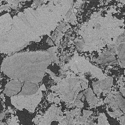

In [23]:
# Let's visualise the first image in the dataset
data_train[0][0]

In [24]:
# Number of images in the dataset
len(data_train)

2400

In [28]:
# In this dataset, the first
data_train[92]

(<PIL.Image.Image image mode=RGB size=125x125 at 0x7F185B32EC50>, 0)

In the first position there is a PIL image and the second one correspond to the label:

0: carbonate2D
1: coal2D
2: sandstone3D

In [29]:
def show_image(interval):
    print("label:", data_train[interval][1])
    print("label_str:", data_train.classes[data_train[interval][1]])
    display(data_train[interval][0])

In [30]:
# (advanced) Now let's visualise all images in the dataset using `interact`.
# We can pass any python function followed by arguments (e.g. `interval` to the show_image function)
interact(show_image, interval=(0, len(data_train) - 1))

interactive(children=(IntSlider(value=1199, description='interval', max=2399), Output()), _dom_classes=('widge…

<function __main__.show_image(interval)>

Images are a type of data. For colored images they usually range from 0 to 255 and have 3 dimensions for every channel (R)ed, (G)reen, (B)lue.

More information related to the RGB colors space: https://en.wikipedia.org/wiki/RGB_color_model

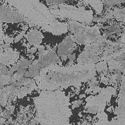

(None, 0)

In [43]:
# let's check any random image
img, label = data_train[49]
display(img), label

That same image can be analyse as a multidimensional array where every pixel has 3 values in the RGB color space.

To check the values we will first need to convert the PIL image to an array. We will do so using the numpy library:

In [45]:
# TODO Mike load and greyscale
img = np.array(img)
print(img.shape)

(125, 125, 3)


If we try to flatten out the array to one single dimension we would have a vector with size 46875

In [46]:
125 * 125 * 3

46875

This means that we have an image with a size of 125x125 and 3 channels (RGB channels). Let's have a look at the data inside.

In [47]:
img

array([[[121, 121, 121],
        [117, 117, 117],
        [ 90,  90,  90],
        ...,
        [136, 136, 136],
        [132, 132, 132],
        [126, 126, 126]],

       [[159, 159, 159],
        [123, 123, 123],
        [ 84,  84,  84],
        ...,
        [135, 135, 135],
        [132, 132, 132],
        [139, 139, 139]],

       [[111, 111, 111],
        [149, 149, 149],
        [159, 159, 159],
        ...,
        [136, 136, 136],
        [124, 124, 124],
        [ 96,  96,  96]],

       ...,

       [[150, 150, 150],
        [158, 158, 158],
        [153, 153, 153],
        ...,
        [151, 151, 151],
        [159, 159, 159],
        [159, 159, 159]],

       [[134, 134, 134],
        [146, 146, 146],
        [125, 125, 125],
        ...,
        [157, 157, 157],
        [158, 158, 158],
        [158, 158, 158]],

       [[131, 131, 131],
        [145, 145, 145],
        [120, 120, 120],
        ...,
        [156, 156, 156],
        [150, 150, 150],
        [156, 156, 156]]

Because the images are actually gray-scale images (no colored) they will only need one channel instead of three.

We can take only one channel instead of three, whichseems to be duplicated data  in these case. But first, let's convert the images into arrays and split it into the features `X` and target `y`

In [48]:
X = np.array([np.array(img) for (img, target) in data_train])
y = np.array(data_train.targets)

In [51]:
# TODO what to these mean
X.shape

(2400, 125, 125)

In [50]:
# In this line of code we are selecting only the first channel and reshaping our features array
X = X[:, :, :, 0]

In [52]:
print(X.shape)
len_before = 125 * 125 * 3
len_after = 125 * 125
print("No. fearures before:", len_before)
print("No. features now:", len_after)
print(
    "So we just removed a 1/3 of the redundant data. That's about {} less than before".format(len_before - len_after)
)

(2400, 125, 125)
No. fearures before: 46875
No. features now: 15625
So we just removed a 1/3 of the redundant data. That's about 31250 less than before


Let's check the first image

In [53]:
print(X[0])
print("Shape:", X[0].shape)

[[139 168 144 ... 149 141 150]
 [176 126  51 ... 150 155 151]
 [156 100  57 ... 148 160 162]
 ...
 [140 119 115 ... 141 131 133]
 [144 145 154 ... 136 132 134]
 [131 142 156 ... 147 130 146]]
Shape: (125, 125)


Let's check if remove the right channels. We can use `Image.fromarray` to convert back an array to a PIL Image. We will do this just to visually check if the new array is ok.

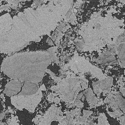

In [54]:
display(Image.fromarray(X[0]))

# Final Project

Complete the code and organise your code in a clear way. Add comments to your code the best as you can to explain your approach.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

## 1. Data preparation and visualisation

- Take some technique from the unsupervised from the unsupervised learning notebook, and apply to X (and y?)
- Visualize the results

## 2. Model Development

  - Use 2 different techniques of clustering and create 2d plots to visualise those.
      <div class="alert alert-info" style="font-size:100%">
<b>HINT</b>: <br>
        Use the same reduced data you used for the 2d plots. You might find that some tecniques works better than other. So it is worth to explore and visualise different 2d clusters.
      </div>
    
  - Use 3 different supervised learning techniques to predict if an image corresponds to `carbonate`,`coal`, or `sandstone` and evaluate their performance.
  - Choose the best one based on the metrics below.

## 3. Evaluation

  - Evaluate the supervised learning models created using TP,TN, FP, FN, accuracy, recall, precision, confusion matrixc, F1-Score, AUC and ROC curves. Create visualisations when possible for those metrics (For example, AUC, Confusion Matrix and ROC). 